In [1]:
pip install supervision


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import supervision as sv

In [3]:
pip install ultralytics


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from ultralytics import YOLO
import supervision as sv
import numpy as np
import cv2
model = YOLO('models/best.pt')


BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

tracker = sv.ByteTrack()
tracker.reset()

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

In [5]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [294]:
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path="input_videos/test.mp4")

In [43]:
from tqdm import tqdm
crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    results = model.predict(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops


collecting crops: 0it [00:00, ?it/s]


0: 800x1280 1 ball, 9 players, 1 referee, 1616.5ms
Speed: 48.4ms preprocess, 1616.5ms inference, 11.5ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 1it [00:01,  1.81s/it]


0: 800x1280 1 ball, 12 players, 1 referee, 1417.4ms
Speed: 16.4ms preprocess, 1417.4ms inference, 3.1ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 2it [00:03,  1.68s/it]


0: 800x1280 1 ball, 10 players, 1 referee, 1693.8ms
Speed: 17.3ms preprocess, 1693.8ms inference, 2.6ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 3it [00:05,  1.78s/it]


0: 800x1280 1 ball, 12 players, 1269.8ms
Speed: 16.0ms preprocess, 1269.8ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 4it [00:07,  1.77s/it]


0: 800x1280 12 players, 1606.2ms
Speed: 16.3ms preprocess, 1606.2ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 5it [00:08,  1.79s/it]


0: 800x1280 1 ball, 11 players, 1 referee, 1347.4ms
Speed: 17.6ms preprocess, 1347.4ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 6it [00:10,  1.69s/it]


0: 800x1280 1 ball, 14 players, 1239.6ms
Speed: 17.6ms preprocess, 1239.6ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 7it [00:11,  1.60s/it]


0: 800x1280 1 ball, 13 players, 2 referees, 1337.1ms
Speed: 17.7ms preprocess, 1337.1ms inference, 4.2ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 8it [00:13,  1.58s/it]


0: 800x1280 1 ball, 14 players, 1 referee, 1392.5ms
Speed: 29.0ms preprocess, 1392.5ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 9it [00:14,  1.58s/it]


0: 800x1280 15 players, 1 referee, 1439.9ms
Speed: 14.2ms preprocess, 1439.9ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 10it [00:16,  1.61s/it]


0: 800x1280 2 balls, 20 players, 1 referee, 1441.9ms
Speed: 18.5ms preprocess, 1441.9ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 11it [00:18,  1.61s/it]


0: 800x1280 1 ball, 18 players, 1 referee, 1472.7ms
Speed: 20.1ms preprocess, 1472.7ms inference, 3.1ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 12it [00:19,  1.61s/it]


0: 800x1280 1 ball, 14 players, 1 referee, 1650.6ms
Speed: 17.3ms preprocess, 1650.6ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 13it [00:21,  1.68s/it]


0: 800x1280 2 balls, 15 players, 2 referees, 1403.4ms
Speed: 18.7ms preprocess, 1403.4ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 14it [00:23,  1.65s/it]


0: 800x1280 1 ball, 17 players, 1 referee, 1351.2ms
Speed: 16.4ms preprocess, 1351.2ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 15it [00:24,  1.60s/it]


0: 800x1280 1 ball, 1 goalkeeper, 14 players, 2 referees, 1629.3ms
Speed: 18.4ms preprocess, 1629.3ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 16it [00:26,  1.66s/it]


0: 800x1280 1 ball, 15 players, 1 referee, 1406.8ms
Speed: 17.7ms preprocess, 1406.8ms inference, 2.4ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 17it [00:28,  1.62s/it]


0: 800x1280 1 ball, 14 players, 1 referee, 1318.5ms
Speed: 15.0ms preprocess, 1318.5ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 18it [00:29,  1.58s/it]


0: 800x1280 1 ball, 13 players, 1 referee, 1371.7ms
Speed: 19.4ms preprocess, 1371.7ms inference, 3.7ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 19it [00:31,  1.58s/it]


0: 800x1280 1 ball, 12 players, 1 referee, 1493.7ms
Speed: 15.9ms preprocess, 1493.7ms inference, 2.1ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 20it [00:32,  1.61s/it]


0: 800x1280 13 players, 2 referees, 1399.1ms
Speed: 21.2ms preprocess, 1399.1ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 21it [00:34,  1.60s/it]


0: 800x1280 1 ball, 12 players, 1 referee, 1535.8ms
Speed: 20.8ms preprocess, 1535.8ms inference, 2.9ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 22it [00:36,  1.65s/it]


0: 800x1280 1 ball, 10 players, 1 referee, 1433.9ms
Speed: 17.0ms preprocess, 1433.9ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 23it [00:37,  1.64s/it]


0: 800x1280 12 players, 2 referees, 1418.1ms
Speed: 20.7ms preprocess, 1418.1ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 24it [00:39,  1.62s/it]


0: 800x1280 11 players, 1 referee, 1336.0ms
Speed: 20.0ms preprocess, 1336.0ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 1280)


collecting crops: 25it [00:40,  1.64s/it]


In [45]:
images = []
for crop in crops:
    image = crop[0:int(crop.shape[0]/2), :]
    images.append(image)

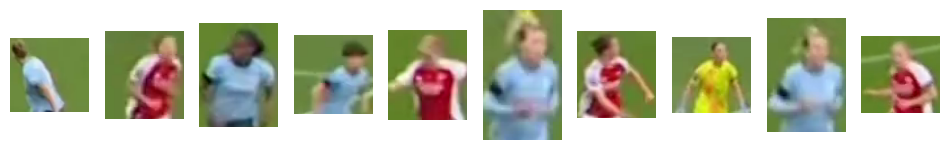

In [46]:
sv.plot_images_grid(images[:10], grid_size=(1, 10))

In [224]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

team_colors = {
    0: np.array([239, 1, 7]),  # Blue team RGB
    1: np.array([108, 171, 221]),       # Red team RGB
}

def get_dominant_color(image):
    """Extracts the dominant color from an image using k-means clustering."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert from BGR to RGB
    pixels = image.reshape(-1, 3)  # Flatten the image to a list of pixels
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(pixels)
    dominant_color = kmeans.cluster_centers_[np.argmax(np.bincount(kmeans.labels_))]

    return dominant_color.astype(int)

def assign_team(color):
    """Assigns a player to a team based on the closest color match."""
    distances = {team: np.linalg.norm(color - team_color) for team, team_color in team_colors.items()}
    return min(distances, key=distances.get)  # Return the team with the smallest distance

def classify(players_crops):
    if len(players_crops) == 0:
        return np.array([])
    team_assignments = []
    for crop in players_crops:
        dominant_color = get_dominant_color(crop)
        team = assign_team(dominant_color)
        team_assignments.append(team)
    return np.array(team_assignments, dtype=int)



TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [240]:
import cv2
import numpy as np
from scipy.spatial import distance
team_1_color_bgr = np.uint8([[[239, 1, 7]]])  # Blue team
team_2_color_bgr = np.uint8([[[108, 171, 221]]])  # Red team
team_1_color_lab = cv2.cvtColor(team_1_color_bgr, cv2.COLOR_RGB2LAB)[0][0]
team_2_color_lab = cv2.cvtColor(team_2_color_bgr, cv2.COLOR_RGB2LAB)[0][0]

team_colors = (team_1_color_lab, team_2_color_lab)
def extract_shirt_color(crop):
    """
    Extracts the dominant shirt color from a player's bounding box.
    """

    # Focus on the upper half of the player (shirt region)
    shirt_region = crop[0:int(crop.shape[0]/2), :]

    # Convert to LAB color space for better color matching
    lab_shirt = cv2.cvtColor(shirt_region, cv2.COLOR_BGR2LAB)

    # Reshape for clustering
    pixels = lab_shirt.reshape(-1, 3)
    unique, counts = np.unique(pixels, axis=0, return_counts=True)
    dominant_color = unique[np.argmax(counts)]  # Most frequent color
    
    return dominant_color

def classify_team(player_color):
    """
    Assigns a player to the team with the closest LAB color.
    """
    team_1_color, team_2_color = team_colors  # LAB colors of the two teams

    # Compute Euclidean distance in LAB space
    dist_team1 = distance.euclidean(player_color, team_1_color)
    dist_team2 = distance.euclidean(player_color, team_2_color)

    return 0 if dist_team1 < dist_team2 else 1  # Return team number

def assign_players_to_teams(players_crops):
    """
    Loops through all players, extracts shirt colors, and assigns teams.
    """
    team_assignments = []

    for crop in players_crops:
        player_color = extract_shirt_color(crop)
        team = classify_team(player_color)
        team_assignments.append(team)
        print(team)
        #sv.plot_image(crop)
    return team_assignments

In [295]:
def get_hsv_range(rgb, hue_tolerance=10, sat_tolerance=40, val_tolerance=40):
    """
    Convert an RGB color to HSV and generate a lower and upper HSV range.
    
    Parameters:
        rgb: Tuple of (R, G, B) values (0-255).
        hue_tolerance: Allowed variation in hue (default: ±10).
        sat_tolerance: Allowed variation in saturation (default: ±40).
        val_tolerance: Allowed variation in value (default: ±40).
    
    Returns:
        lower_hsv, upper_hsv: The HSV range for color detection.
    """

    # Convert RGB to a NumPy array (OpenCV uses BGR, so we flip RGB to BGR)
    bgr_color = np.uint8([[[rgb[2], rgb[1], rgb[0]]]])  # Convert RGB to BGR format
    hsv_color = cv2.cvtColor(bgr_color, cv2.COLOR_BGR2HSV)[0][0]  # Convert to HSV

    h, s, v = hsv_color  # Extract HSV values

    # Define lower and upper bounds with tolerances
    lower_hue = max(h - hue_tolerance, 0)
    upper_hue = min(h + hue_tolerance, 179)  # Hue is in range [0, 179]

    lower_saturation = max(s - sat_tolerance, 50)  # Keep some minimum saturation to avoid gray/white detection
    upper_saturation = min(s + sat_tolerance, 255)

    lower_value = max(v - val_tolerance, 50)  # Keep some minimum brightness
    upper_value = min(v + val_tolerance, 255)

    lower_hsv = np.array([lower_hue, lower_saturation, lower_value], dtype=np.uint8)
    upper_hsv = np.array([upper_hue, upper_saturation, upper_value], dtype=np.uint8)

    return lower_hsv, upper_hsv

In [292]:
print(get_hsv_range([227, 34, 33]))

(array([  0, 178, 187], dtype=uint8), array([ 10, 255, 255], dtype=uint8))


In [296]:
def count_nonblack_np(img):
    """Counts non-black pixels in an image or binary mask."""
    if len(img.shape) == 2:  # If grayscale (binary mask)
        return np.count_nonzero(img)
    else:  # If BGR image
        return np.count_nonzero(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def detect_team(image):
    """Detects whether a cropped shirt belongs to Arsenal (red) or Man City (sky blue)."""

    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Arsenal (Red) - Red wraps around in HSV, so we use two ranges
    lower_red1 = np.array([0, 100, 50], dtype="uint8")   # Lower red range
    upper_red1 = np.array([10, 255, 255], dtype="uint8")

    lower_red2 = np.array([170, 100, 50], dtype="uint8")  # Upper red range
    upper_red2 = np.array([180, 255, 255], dtype="uint8")

    # Man City (Sky Blue)
    lower_blue = np.array([90, 50, 50], dtype="uint8")   # Sky blue range
    upper_blue = np.array([120, 255, 255], dtype="uint8")

    # Create masks
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = mask_red1 + mask_red2  # Combine both red masks

    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # Calculate color ratio
    total_pixels = count_nonblack_np(image)  # Original BGR image
    red_pixels = count_nonblack_np(mask_red)  # Binary mask (no need to convert)
    blue_pixels = count_nonblack_np(mask_blue)  # Binary mask (no need to convert)

    red_ratio = red_pixels / total_pixels
    blue_ratio = blue_pixels / total_pixels

    #print(f"Red ratio: {red_ratio:.3f}, Blue ratio: {blue_ratio:.3f}")

    # Classify based on ratio threshold
    if red_ratio > 0.1:
        return 0
    elif blue_ratio > 0.1:
        return 1
    else:
        return 2

def assign_players_to_teams(players_crops):
    """
    Loops through all players, extracts shirt colors, and assigns teams.
    """
    team_assignments = []

    for crop in players_crops:
        shirt_region = crop[0:int(crop.shape[0]/2), :]
        team = detect_team(shirt_region)
        team_assignments.append(team)
        #sv.plot_image(crop)
    return team_assignments

In [297]:
frame = next(frame_generator)
results = model.predict(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(results)
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)
all_detections = detections[detections.class_id != BALL_ID] 
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)
goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID] 
players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]


0: 800x1280 1 ball, 9 players, 1 referee, 1443.9ms
Speed: 13.6ms preprocess, 1443.9ms inference, 2.3ms postprocess per image at shape (1, 3, 800, 1280)


In [276]:
print(players_detections)
player_team_dict = {}
for class_id, tracker_id in zip(players_detections.class_id,players_detections.tracker_id):
    player_team_dict[tracker_id] = class_id

print(player_team_dict)

Detections(xyxy=array([[     937.79,      1109.5,      1017.7,      1310.5],
       [     1900.5,      996.47,        2004,      1173.1],
       [     1320.2,      1085.8,      1406.1,        1279],
       [     1625.1,       811.5,      1723.4,      952.16],
       [     1221.8,      1009.2,      1331.7,      1175.6],
       [     1052.9,      517.17,      1125.3,      638.77],
       [     473.32,      864.84,      538.04,      1028.1],
       [     2718.5,      1062.3,        2802,      1243.3],
       [     1343.3,      638.68,      1422.3,      775.28],
       [     1455.5,      647.27,      1548.3,      783.57],
       [     455.27,      580.63,      543.38,      725.88],
       [     2354.2,         958,      2450.7,      1142.9],
       [       1429,      563.37,      1488.5,      708.75],
       [     876.59,      813.95,      958.13,      972.68]], dtype=float32), mask=None, confidence=array([     0.9056,     0.90226,     0.90134,     0.89994,     0.89801,     0.89669,      0

In [283]:
for crop in players_crops:
    print(extract_shirt_color(crop))
#sv.plot_images_grid(players_crops, grid_size=(1,10))

[128 104 164]
[121 103 164]
[124 104 164]
[144 104 159]
[130 103 164]
[133 106 159]
[135 105 160]
[138 104 158]
[137 103 162]
[136 103 162]
[135 105 161]
[139 104 159]
[139 106 158]


[1, 0, 1, 1, 0, 1, 0, 2]


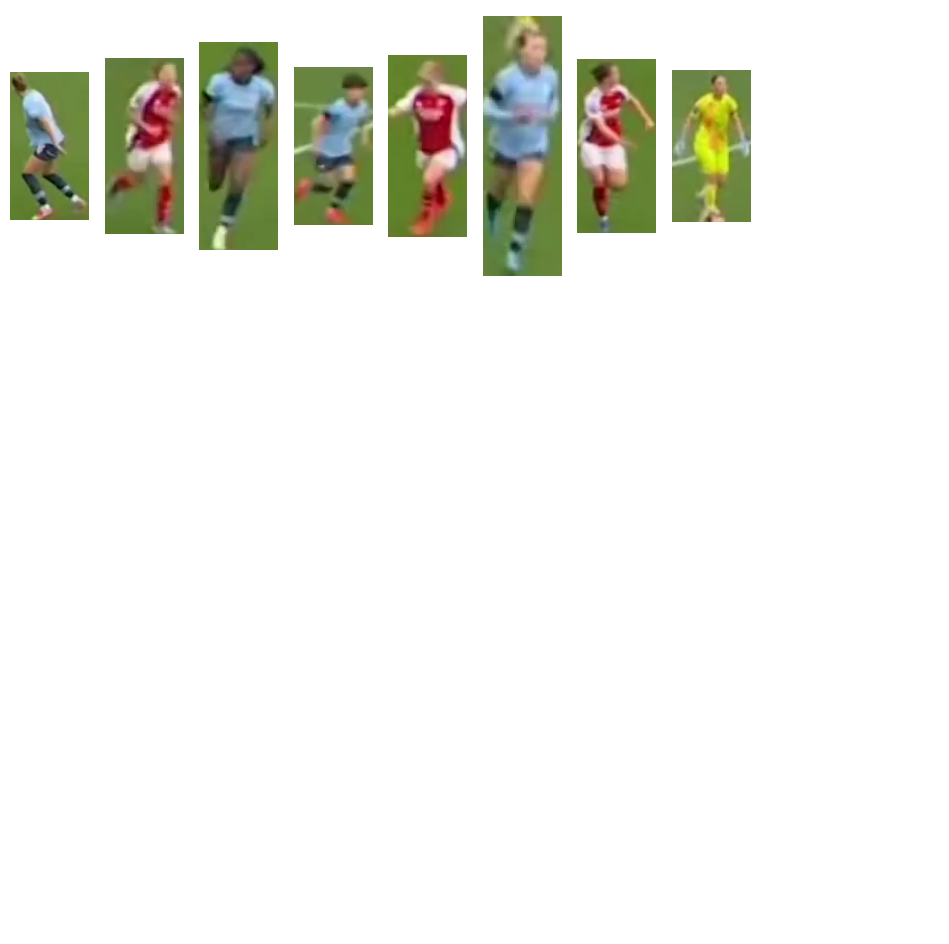

In [298]:
# Process each detected player
print(assign_players_to_teams(players_crops))
sv.plot_images_grid(players_crops, grid_size=(3,10))

In [171]:
def extract_shirt_color(frame, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    upper_part = frame[y1:y1 + (y2 - y1) // 2, x1:x2]
    upper_part = cv2.cvtColor(upper_part, cv2.COLOR_BGR2RGB)  
    upper_part = upper_part.reshape(-1, 3)   # Reshape to (n_pixels, 3) for KMeans
    return upper_part

In [172]:
player_team_dict = {}

In [175]:
def assign_teams(frame, players_detections):
    team_labels = []
    # for bbox in players_detections.xyxy:
    #     shirt_pixels = extract_shirt_color(frame, bbox)
    #     kmeans = KMeans(n_clusters=2)
    #     kmeans.fit(shirt_pixels)
    #     dominant_color = kmeans.cluster_centers_[0]
    #     colors.append(dominant_color)
    # team_labels = kmeans.predict(colors)
    for i , player in enumerate(players_detections):
            bbox = players_detections.xyxy[i]
            shirt_pixels = extract_shirt_color(frame, bbox)
            kmeans = KMeans(n_clusters=2)
            kmeans.fit(shirt_pixels)
            dominant_color = kmeans.cluster_centers_[0]
            team_id = kmeans.predict(dominant_color.reshape(1, -1))[0]
            team_labels.append(team_id)
    print(team_labels)
    return team_labels

In [179]:
def get_player_colors(frame, detections):
    player_colors = []
    
    for bbox in detections.xyxy:
        x1, y1, x2, y2 = map(int, bbox)
        player_roi = frame[y1:y2, x1:x2]
        
        # Convert to HSV color space for better color detection
        hsv_roi = cv2.cvtColor(player_roi, cv2.COLOR_BGR2HSV)
        
        # Get the average color in the center region of the player
        center_y, center_x = (y2-y1)//2, (x2-x1)//2
        color_sample = hsv_roi[center_y-10:center_y+10, center_x-10:center_x+10]
        avg_color = np.mean(color_sample, axis=(0,1))
        
        player_colors.append(avg_color)
    
    return np.array(player_colors)

def assign_teams(frame, players_detections):
    # Get colors for all players
    colors = get_player_colors(frame, players_detections)
    
    # Use K-means clustering to separate into two teams based on color
    kmeans = KMeans(n_clusters=2, random_state=42)
    team_labels = kmeans.fit_predict(colors)

    
    return team_labels


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 756.8ms
Speed: 6.3ms preprocess, 756.8ms inference, 9.3ms postprocess per image at shape (1, 3, 736, 1280)
[1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0]
{1: 1, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 1, 11: 0, 13: 0, 14: 1, 15: 0, 16: 1, 17: 0, 19: 0, 20: 1, 22: 0, 24: 0}


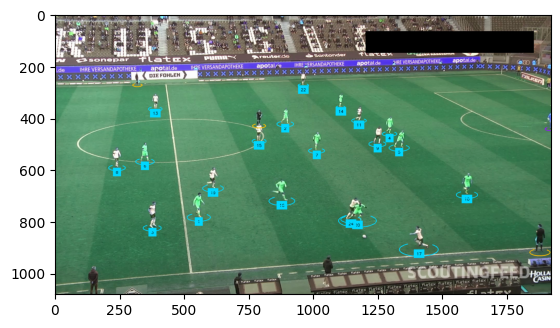

In [180]:
player_dict = {}
results = model.predict(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(results)
all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
team_labels = assign_teams(frame,players_detections)
print(team_labels)
labels = [str(tracker_id) for tracker_id in players_detections.tracker_id]
annotated_frame = frame.copy()
annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=players_detections,
        labels=labels)
annotated_frame = ellipse_annotator.annotate(
        scene=annotated_frame,
        detections=all_detections)

result_dict = dict(zip(players_detections.tracker_id, team_labels))
print(result_dict)
plt.imshow(annotated_frame)
plt.show()

In [74]:
colors = []
for bbox in players_detections.xyxy:
    up = extract_shirt_color(frame, bbox)
    upper_part = up.reshape(-1, 3)
    color = KMeans(n_clusters=2, random_state=0).fit(upper_part).cluster_centers_[0]
    colors.append(color)
    # labels = kmeans.labels_
    # img = labels.reshape(up.shape[0], up.shape[1])
    # plt.imshow(img)
    # plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
team_labels = kmeans.fit_predict(colors)
print(team_labels)
    

[0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1]


In [15]:
for frame in frame_generator:
    results = model.predict(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(results)
    ball_detections = detections[detections.class_id == BALL_ID]
    ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

    all_detections = detections[detections.class_id != BALL_ID]
    all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
    all_detections = tracker.update_with_detections(detections=all_detections)

    goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
    players_detections = all_detections[all_detections.class_id == PLAYER_ID]
    players_detections, team_centers = assign_teams(frame, players_detections)

        # Visualize detections and team assignments
    for i, bbox in enumerate(players_detections.xyxy):
            team_id = players_detections.data["team_id"][i]
            color = (0, 255, 0) if team_id == 0 else (0, 0, 255)  # Green for team 0, Red for team 1

            # # Draw bounding box and label
            # cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, 2)
            # cv2.putText(frame, f"Team {team_id}", (int(bbox[0]), int(bbox[1] - 10)), 
            #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

print(players_detections[0])


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 1524.0ms
Speed: 26.2ms preprocess, 1524.0ms inference, 8.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 1145.6ms
Speed: 53.9ms preprocess, 1145.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 1347.7ms
Speed: 73.2ms preprocess, 1347.7ms inference, 2.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 2211.9ms
Speed: 28.1ms preprocess, 2211.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 1258.2ms
Speed: 12.7ms preprocess, 1258.2ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 22 players, 3 referees, 1187.0ms
Speed: 36.1ms preprocess, 1187.0ms inference, 1.4ms postprocess per image at shape (1, 

In [17]:
labels = [str(tracker_id) for tracker_id in all_detections.tracker_id]
annotated_frame = frame.copy()
annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=all_detections,
        labels=labels)
annotated_frame = ellipse_annotator.annotate(
        scene=annotated_frame,
        detections=all_detections)
annotated_frame = triangle_annotator.annotate(
        scene=annotated_frame,
        detections=ball_detections)

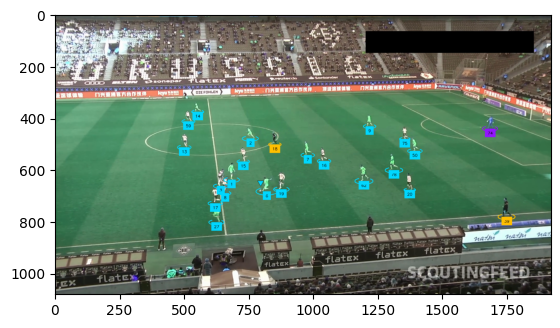

In [20]:
plt.imshow(annotated_frame)
plt.show()